# MODELS
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

<center><img src="https://larspsyll.files.wordpress.com/2014/09/amath.jpg" width="300"/></center>

"Mathematical modelling is the process of describing a real world problem in mathematical terms, usually in the form of equations, and then using these equations both to help understand the original problem, and also to discover new features about the problem." [2] A model is not only used to understand and explain a specific problem, but is also used to make predictions about behaviour [1] Mathematical models are commonly used in the natural sciences (e.g. physics, biology, earth science, chemistry), engineering disciplines (e.g. computer science, electrical engineering), as well as in non-physical systems such as the social sciences (e.g. economics, psychology, sociology, political science). [3] The focus in this notebook is the linear mathematical model.

### LINEAR REGRESSION

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Linear models describe a continuous response variable as a function of one or more predictor variables. [4] They help understanding and predict the behavior of certain complex systems. A very common equotion is the one for the straight line:

###  $$y = mx + c$$

| m is the gradient of the line (how steep the line is). c is the y-intercept (the point in which the line crosses the y-axis). x and y relate to coordinates on the line |
| :-: |
|  |



Inputting a value x into the above equotion, we get a result for y.

In [1]:
# For plotting
import matplotlib.pyplot as plt

# To work with arrays
import numpy as np

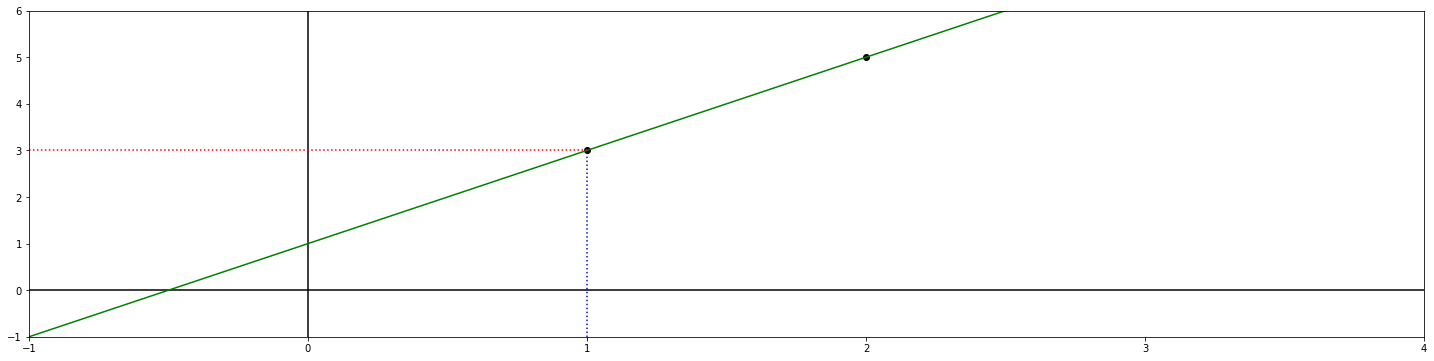

In [2]:
# Plot size
fig, ax = plt.subplots(figsize=(25, 6))
# Draw axes
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

# Plot the two points (1,3) and (2,5)
plt.plot([1, 2], [3, 5], 'ko')
# Draw green line connecting the points
plt.plot([-1, 10], [-1, 21], 'g-')

# Plot the red and the blue lines
plt.plot([1, 1], [-1, 3], 'b:')
plt.plot([-1, 1], [3, 3], 'r:')

# Set plot limits
plt.xlim([-1, 4])
plt.ylim([-1, 6]);

Statistical method to create a linear model is called linear regression. The term regression is used when you try to find the relationship between variables. That relationship is used to predict the outcome of some future events in machine learning. [6] Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range. [5] 

### ANALYSIS

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

#### SIMULATING DATA

In [3]:
# x value
x = np.arange(0.0, 21.0, 1.0)
# Calculate y value
y = 5.0 * x + 10.0 + np.random.normal(0.0, 5.0, x.size)
# Print
x, y

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([  5.77419643,  19.64388108,  23.03478886,  25.40848498,
         32.72822525,  32.32189552,  41.51367307,  47.26250188,
         41.93028955,  57.46701462,  61.8203357 ,  55.89583517,
         75.07680198,  71.47571297,  74.02940447,  86.9635138 ,
         85.65823844,  92.41785462,  97.75027962, 110.62191487,
        124.75378959]))

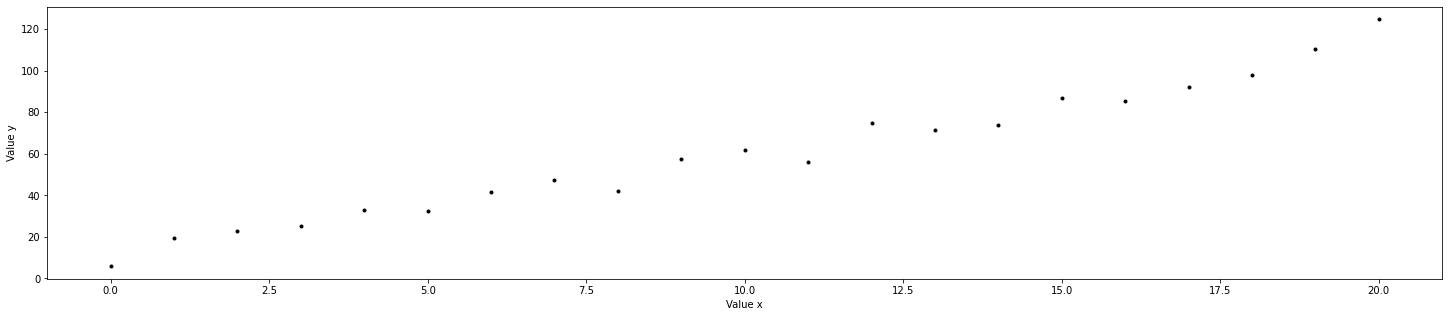

In [4]:
# Create the plot.
plt.rcParams['figure.figsize'] = (25, 5)
plt.plot(x, y, 'k.')

# Set some properties for the plot.
plt.xlabel('Value x')
plt.ylabel('Value y')

# Show the plot.
plt.show()

Points on the plot above don't strictly follow the straight line, but they are also not far from it. We can conclude  that the generated data follows a linear line.

#### BEST FIT LINE

Using the formula for the linear line, we can draw various straight lines that would fit the simulated data

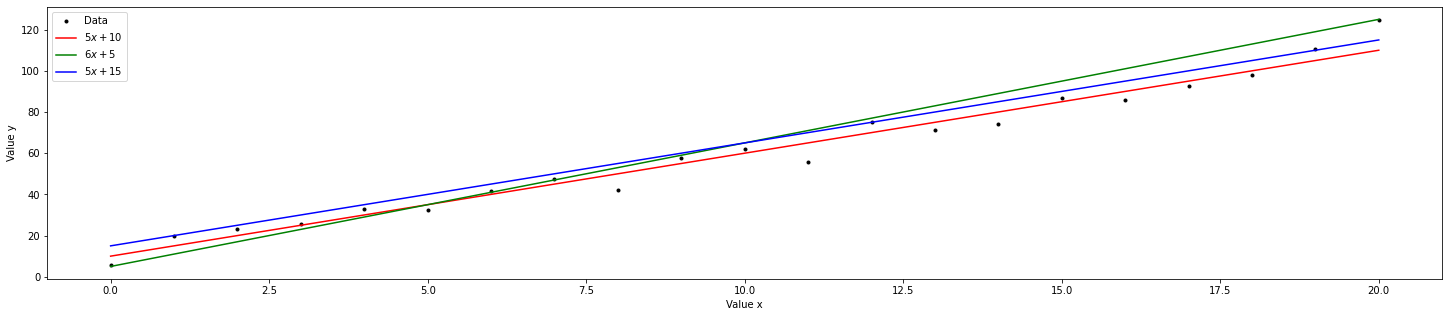

In [5]:
# Create a plot for data (dots)
plt.plot(x, y, 'k.', label="Data")
# Plot size
plt.rcParams['figure.figsize'] = (25, 5)

# Overlay some lines on the plot.
a = np.arange(0.0, 21.0, 1.0)
plt.plot(a, 5.0 * a + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(a, 6.0 * a +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(a, 5.0 * a + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Value x')
plt.ylabel('Value y')

# Show the plot.
plt.show()

It's visible from the above plot how each of the lines roughly fit the data, but the question is which one of those is the best one, and is there one that would with this data better. The usual approach is to use the *least-squares method*, which minimizes the squared difference between the actual data points and a straight line. The formula is:

###  $$ \sum_i (y_i - mx_i - c)^2 $$

| The corresponding value to $x_i$ in the dataset is $y_i$. The value $m x_i + c$ is what the model says $y_i$ should have been. The difference between  the value that was observed ($y_i$) and the value that the model gives ($m x_i + c$), is $y_i - mx_i - c$. |
| :-: |
|  |



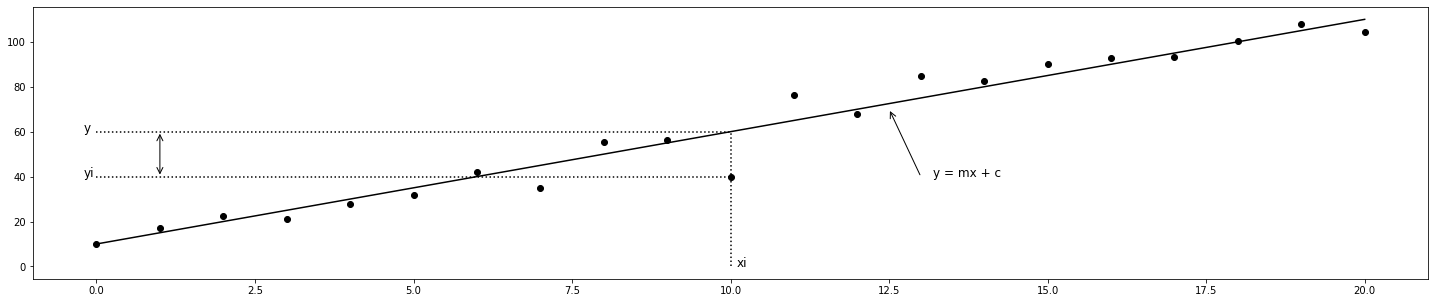

In [6]:
# Linear regression
# noise
noise = [0.01, 2, 2.63, -3.66, -2.12, -3.06, 1.88, -9.96, 5.56,  1.08, -20, 11.27,
         -2.34, 9.83, 2.77, 4.91, 3.01, -1.86, 0.31, 2.94, -5.57]
# x value
x = np.arange(0.0, 21.0, 1.0)
# Calculate y value
y = 5.0 * x + 10.0 + noise

# Plot the data (dots)
plt.plot(x, y, 'ko', label="Data")

# Draw the red line (best fit line).
a = np.arange(0.0, 21, 1.0)
plt.plot(a, 5.0 * a + 10.0, 'k-')

# Draw dotted lines
plt.plot([10, 10], [0, 60], 'k:')
plt.plot([0, 10], [60, 60], 'k:')
plt.plot([0, 10], [40, 40], 'k:')
# Add arrows and text
plt.annotate("", xy=(1, 40), xytext=(1, 60), fontsize = 15, arrowprops=dict(arrowstyle='<->'))
plt.text (x = -0.2, y = 60, s = "y", fontsize = 12)
plt.text (x = -0.2, y = 40, s = "yi", fontsize = 12)
plt.text (x = 10.1, y = 0, s = "xi", fontsize = 12)
plt.annotate("", xy=(13, 40), xytext=(12.5, 70), fontsize = 15, arrowprops=dict(arrowstyle='<-'));
plt.text (x = 13.2, y = 40, s = "y = mx + c", fontsize = 12);

We can calculate the cost of the given lines using the formula above and determine which one is the best fitted.

In [7]:
# Calculate the cost of the lines above for the data above
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f - RED LINE" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f - GREEN LINE" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f - BLUE LINE" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   886.17 - RED LINE
Cost with m =  6.00 and c =  5.00:  2035.57 - GREEN LINE
Cost with m =  5.00 and c = 15.00:  1414.87 - BLUE LINE


We can see that the red line, representing values m = 5 and c = 10 has the minimum value of the three. This just confirms what we already knew, considering we have simulated data ourselves. This however doesn't necessarily means the best fitted line is the red one. We use the cost formula to calculate this.

### MINIMISING THE COST

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We first calculate the mean (average) values of our $x$ values and that of our $y$ values. Then we subtract the mean of $x$ from each of the $x$ values, and the mean of $y$ from each of the $y$ values. Then we take the dot product of the new $x$ values and the new $y$ values and divide it by the dot product of the new $x$ values with themselves. That gives us $m$, and we use $m$ to calculate $c$.

We calculate $m$ and $c$ below.

#### CALCULATE $m$ and $c$ BY HAND

In [8]:
# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c
c = y_avg - m * x_avg

print("m = %8.6f | c = %6.6f." % (m, c))

m = 5.096948 | c = 9.012900.


#### NUMPY.POLYFIT

Python *Numpy* library can be used to do the above calculation in one line of code. It can also be used to fit lines in many dimensions.

In [9]:
# Calculate m and c
m, c = np.polyfit(x, y, 1)
print("m = %8.6f | c = %6.6f." % (m, c))

m = 5.096948 | c = 9.012900.


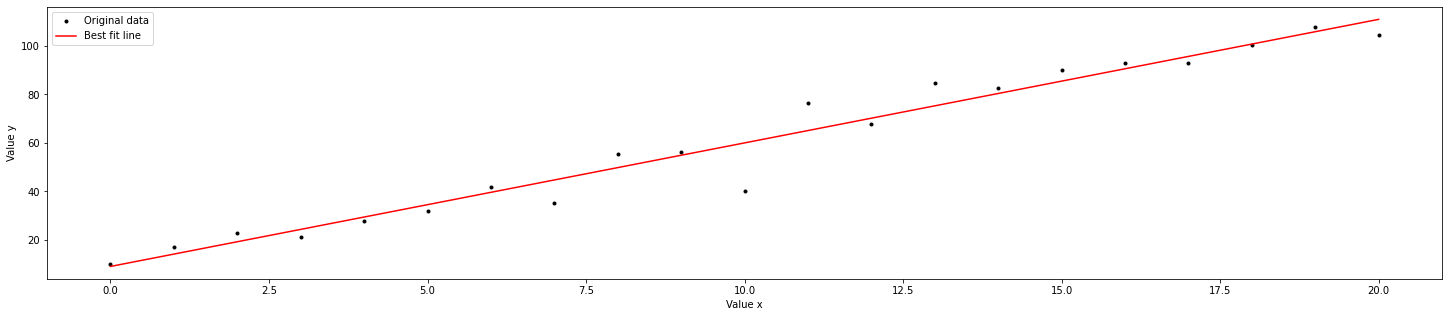

In [10]:
# Plot the best fit line
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'r-', label='Best fit line')

# Add axis labels and a legend
plt.xlabel('Value x')
plt.ylabel('Value y')
plt.legend();

#### SCIPY.OPTIMIZE.MINIMIZE

In [11]:
# Optimization
import scipy.optimize as so

# Numerical arrays
import numpy as np

In [12]:
def cost(MC):
    # Unpack the values m and c
    m, c = MC
    # We need the data points in this function
    cost = np.sum((y - m * x - c)**2)
    # Return that value
    return cost

In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 878.9256088744631
 hess_inv: array([[ 0.00064937, -0.00649379],
       [-0.00649379,  0.08874897]])
      jac: array([ 0.00000000e+00, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([5.09694798, 9.01290129])

In [14]:
# Extract the optimized m and c
m_o, c_o = result.x
# Print them.
m_o, c_o

(5.096947982192045, 9.01290128994556)

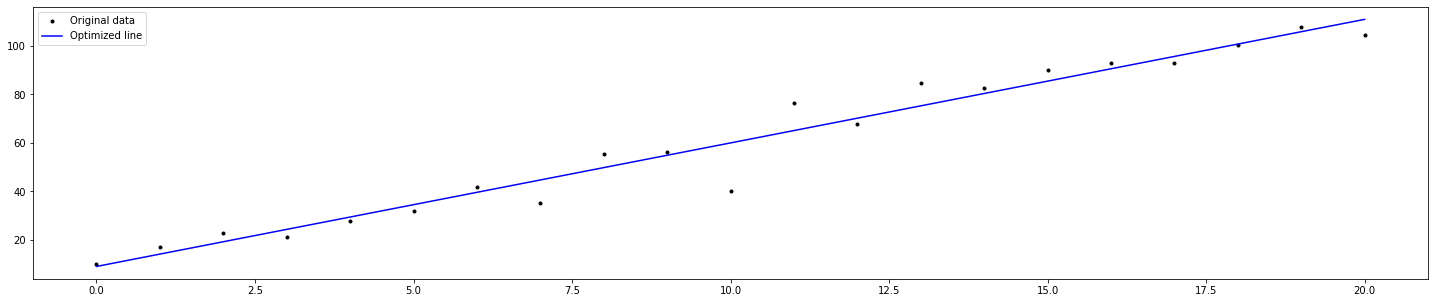

In [15]:
# Plot the best fit line from the optimization
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
# ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

#### SCIPY.OPTIMIZE.CURVE_FIT

In [35]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function
def f(x, m, c):
    return m * x + c

In [17]:
# Run curve_fit
result = so.curve_fit(f, x, y)
result

(array([5.09694805, 9.01290042]),
 array([[ 0.06007694, -0.60076939],
        [-0.60076939,  8.21051497]]))

In [18]:
# Pull out the parameters
m_f, c_f = result[0]
# Print values
m_f, c_f

(5.096948052661027, 9.01290042448312)

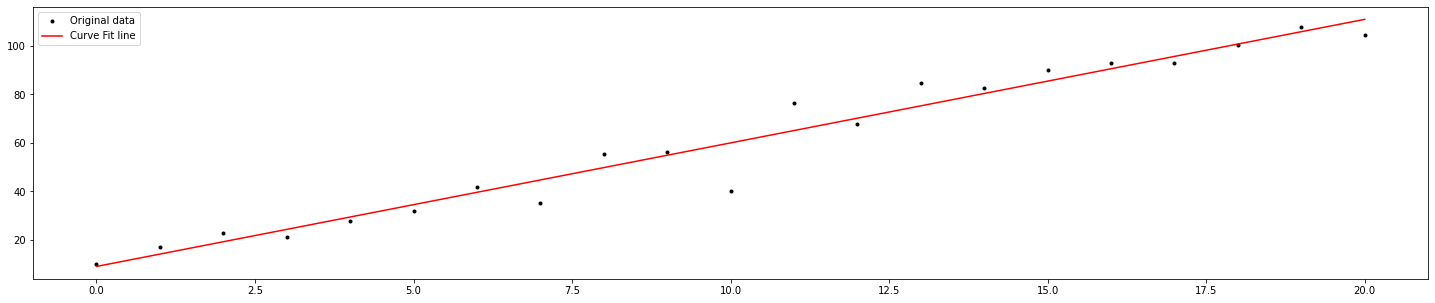

In [19]:
# Plot the best fit line from the optimization
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
#ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

<hr style="border-top: 20px solid #add8e6;" />

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">EXERCISE 1</h4>

<h5 style="color: #001a79;">Use numpy and matplotlib to plot the absolute value function. Research and explain why the absolute value function is not typically used in fitting straight lines to data.</h5>
<hr style="border-top: 1px solid #001a79;" />

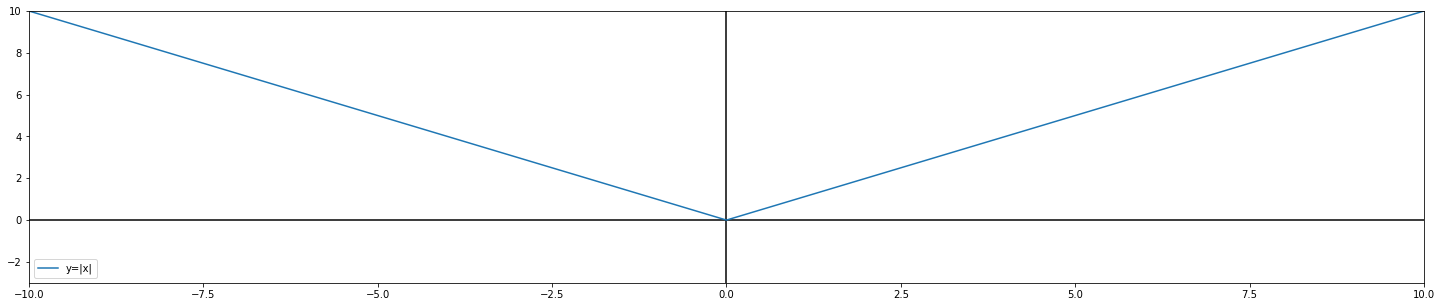

In [20]:
# Drawing absolute function
# Draw some axes.
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([0, 0], [-10, 10], 'k-')

x1 = np.arange(-10, 11, 1.0)
y1 = abs(x1)
plt.plot(x1, y1, label="y=|x|")
plt.legend()
# Set some reasonable plot limits.
plt.xlim([-10, 10])
plt.ylim([-3, 10]);

#### Fitting of linear models using Least Absolute Deviations

The following is adapted from: https://mirca.github.io/lad/ipython_notebooks/getting-started.html

In [21]:
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression

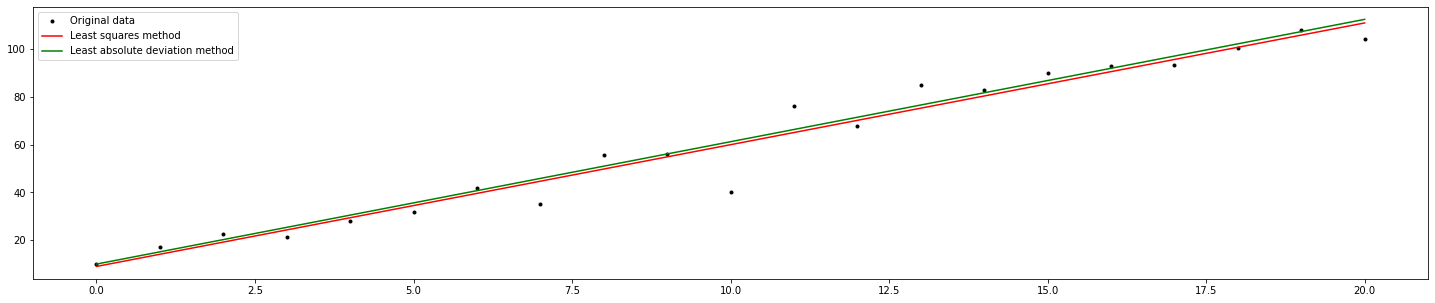

In [22]:
# Plot the best fit line from the optimization.
x = x.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Least squares method')
plt.plot(x, LADRegression().fit(x, y).predict(x), 'g', label='Least absolute deviation method')
ax.legend()

# Show the plot.
plt.show()

<hr style="border-top: 1px solid  #d48a72;" />
<h5 style="color: #d48a72;">ANSWER: There is a consensus that absolute value is harder to calculate (by hand) compared to the least squares.  When solving an optimization problems  we take the derivative to find the points where it is equal to 0. When differentiating, absolute values are way harder to differentiate compared to the  squares, especially due to their non-linearity. Also, least squares regression lines are more efficient. They don't require as great of a number of samples to get a good estimate of the true regression line. [7]  <h5>
<hr style="border-top: 1px solid  #d48a72;" />

<hr style="border-top: 20px solid #add8e6;" />

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">EXERCISE 2</h4>

<h5 style="color: #001a79;">Fit a straight line to the following data points, using all three methods used above. Do you think a straight line is a good model for these points?</h5>
<h5 style="color: #001a79;">x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]</h5>
<h5 style="color: #001a79;">y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]</h5>
<hr style="border-top: 1px solid #001a79;" />

In [23]:
# Data
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

x = np.array(x)
y = np.array(y)

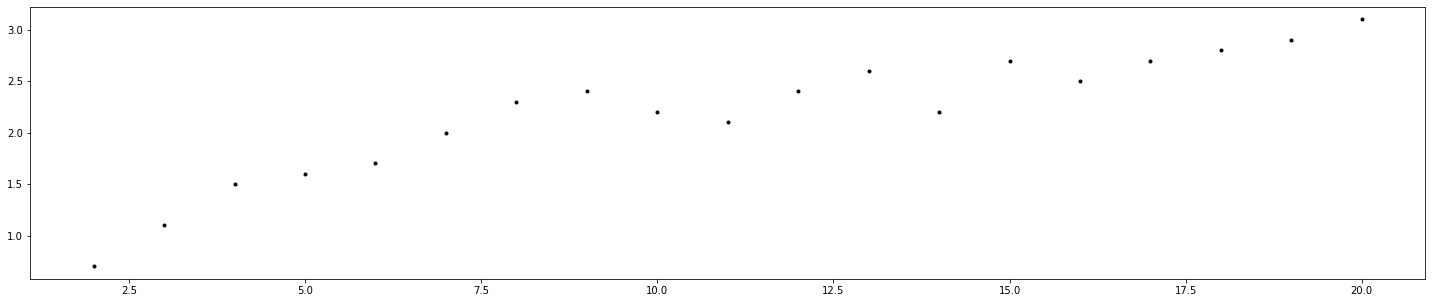

In [24]:
# Plotting the data
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(x, y, 'k.', label='Original data')
plt.show()

##### METHOD 1 - numpy.polyfit

In [25]:
m, c = np.polyfit(x, y, 1)

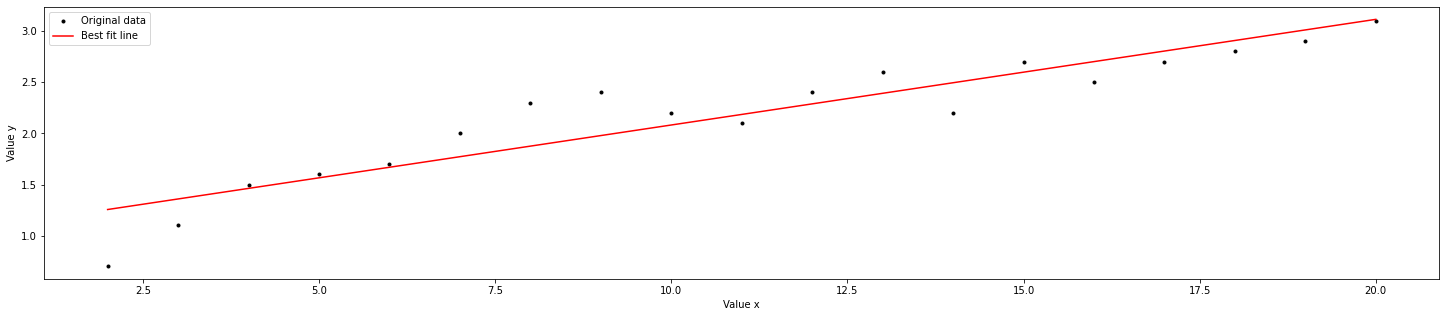

In [26]:
# Plot the best fit line
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'r-', label='Best fit line')

# Add axis labels and a legend
plt.xlabel('Value x')
plt.ylabel('Value y')
plt.legend();

##### METHOD 2 - scipy.optimize.minimize

In [27]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2, 2))
# Show the results.
result

      fun: 1.03957894736911
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([1.49011612e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [28]:
# Extract the optimized m and c
m_o, c_o = result.x
# Print them
m_o, c_o

(0.10315785999003411, 1.0494740589312146)

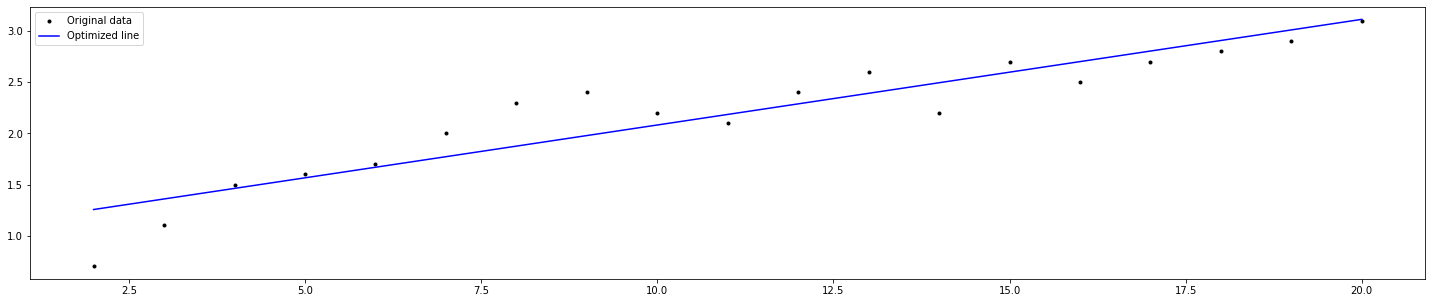

In [29]:
# Plot the best fit line from the optimization
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.legend();

##### METHOD 3 - scipy.optimize.curve_fit

In [30]:
# Define the function
def f(x, m, c):
    return m * x + c

In [31]:
result = so.curve_fit(f, x, y)
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [32]:
# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

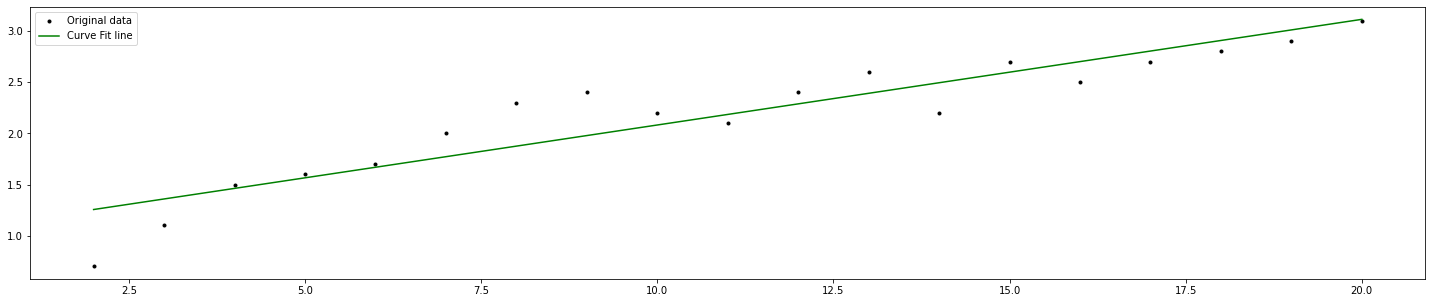

In [33]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'g-', label='Curve Fit line')
ax.legend();

#### CONCLUSION

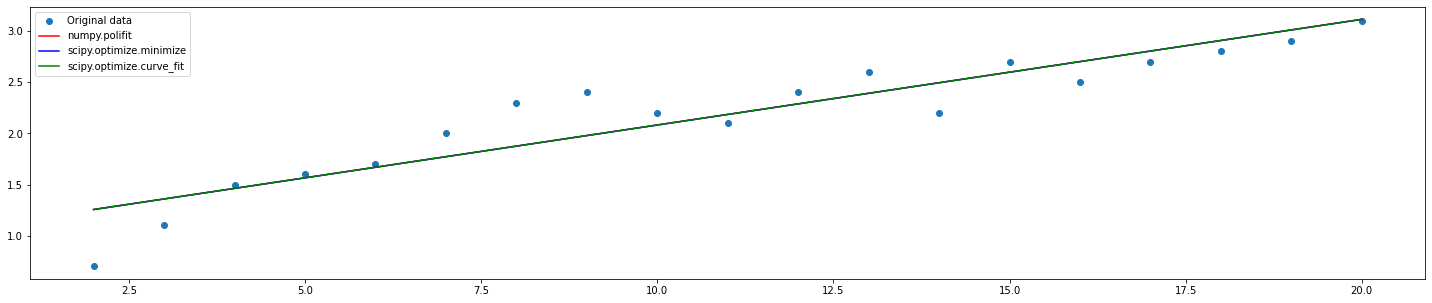

In [34]:
# Plotting all three metods
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(x, y, 'o', label='Original data')
ax.plot(x, m * x + c, 'r-', label='numpy.polifit')
ax.plot(x, m_o * x + c_o, 'b-', label='scipy.optimize.minimize')
ax.plot(x, m_f * x + c_f, 'g-', label='scipy.optimize.curve_fit')
ax.legend();

<hr style="border-top: 1px solid  #d48a72;" />
<h5 style="color: #d48a72;">ANSWER: We can see that using any of the models give the same results, as all three lines overlap eachother. The real question is if fitting a straight line is a good model for the given data. If we look at the plot above we can see that there are only a few datapoints that are intercepted by the straight line, and most of the points are actually for away from the line. This leads to the conclusion that a curved line could possibly be a better model for the given dataset. <h5>
<hr style="border-top: 1px solid  #d48a72;" />

<hr style="border-top: 20px solid #add8e6;" />

<hr style="border-top: 1px solid #001a79;" />

## REFERENCES
***

1. IGI Global (2023), What is Mathematical Model, Available at: https://www.igi-global.com/dictionary/mathematical-model/18021
2. Budd, C (2021), What Is Mathematical Modelling?, Available at: https://www.mathscareers.org.uk/what-is-mathematical-modelling/
3. Wikipedia (2022), Mathematical model, Available at: https://en.wikipedia.org/wiki/Mathematical_model
4. MathWorks (2023), Linear Model, Available at: https://www.mathworks.com/discovery/linear-model.html
5. Revision (2017), Linear Regression, Available at: https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html
6. W3 Schools (2022), Machine Learning - Linear Regression, Available at: https://www.w3schools.com/python/python_ml_linear_regression.asp
7. Stackoverflow (2020), Why does regression use least "squares" instead of least "absolute values"?, Available at: https://math.stackexchange.com/questions/3580109/why-does-regression-use-least-squares-instead-of-least-absolute-values